In [193]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [194]:
df = pd.read_excel('C:\\Users\\Adela\\precio_pan_deflactado.xlsx')
df=df.round(2)
df['Mes'] = df['Mes'].replace({
    "Enero":"January","Enero " :"January",
    'Febrero': 'February',"Marzo":"March",
    'Abril': 'April',"Mayo":"May","Junio":"June","Julio":"July","Agosto":"August",
    "Septiembre":"September","Octubre":"October","Noviembre":"November","Diciembre":"December"
})

In [195]:
df['month_number'] = pd.to_datetime(df['Mes'], format='%B').dt.month
df['month_year'] = df['month_number'].astype(str).str.zfill(2) + '/' + df["Año"].astype(str)
df['Precio deflactado'] = df['Precio deflactado'].replace({"-":38.64})
df["month_year"]=pd.to_datetime(df["month_year"], format="%m/%Y")
df["Precio deflactado"]=df["Precio deflactado"].round(2)
df

C:\Users\Adela\AppData\Local\Temp\ipykernel_14384\647864484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Precio deflactado'] = df['Precio deflactado'].replace({"-":38.64})


,Año,Mes,Pan francés(kg),IPC mensual,Índice IPC,IPC (base junio 2017 = 100),Precio deflactado,month_number,month_year
0,2017,June,38.64,-,100.00,100,38.64,6,2017-06-01
1,2017,July,39.12,1.7,101.70,100,38.47,7,2017-07-01
2,2017,August,39.43,1.4,103.12,100,38.24,8,2017-08-01
3,2017,September,39.71,1.9,105.08,100,37.79,9,2017-09-01
4,2017,October,39.89,1.5,106.66,100,37.40,10,2017-10-01
...,...,...,...,...,...,...,...,...,...
89,2024,November,3040.97,2.4,6678.45,100,45.53,11,2024-11-01
90,2024,December,3095.49,2.7,6858.77,100,45.13,12,2024-12-01
91,2025,January,3154.17,2.2,7009.66,100,45.00,1,2025-01-01
92,2025,February,3212.93,2.4,7177.89,100,44.76,2,2025-02-01


Text(0.5, 1.0, 'Diciembre-Abril , 2017-2025')

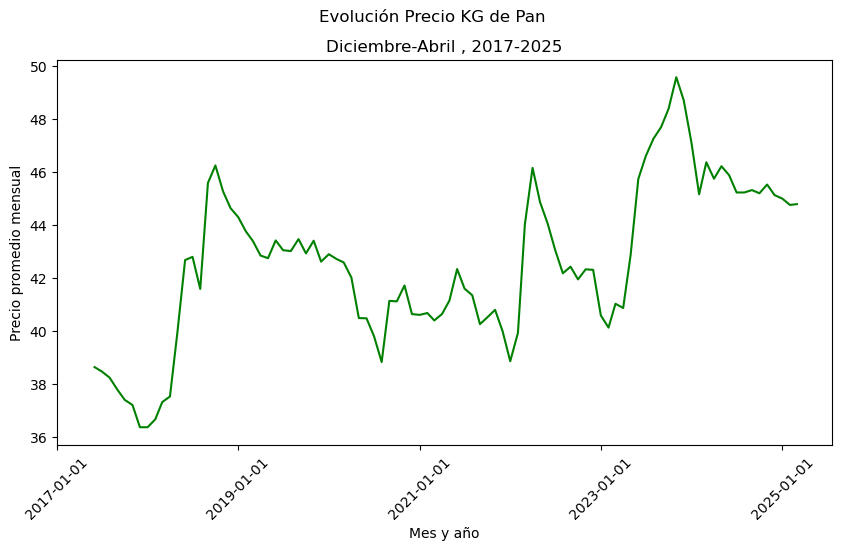

In [196]:
plt.figure(figsize=(10, 5))
plt.plot(df['month_year'], df["Precio deflactado"], linestyle='-', color='green')
plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=45)
plt.suptitle('Evolución Precio KG de Pan')
plt.xlabel('Mes y año')
plt.ylabel('Precio promedio mensual')
plt.title('Diciembre-Abril , 2017-2025')

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
df["Precio deflactado"]

0     38.64
1     38.47
2     38.24
3     37.79
4     37.40
      ...  
89    45.53
90    45.13
91    45.00
92    44.76
93    44.79
Name: Precio deflactado, Length: 94, dtype: float64

In [198]:
df["precio_1"] = df["Precio deflactado"].shift(1, fill_value=0)
df["precio_2"] = df["Precio deflactado"].shift(2, fill_value=0)
df["precio_3"] = df["Precio deflactado"].shift(3, fill_value=0)
df["precio_4"] = df["Precio deflactado"].shift(4, fill_value=0)
df["precio_5"] = df["Precio deflactado"].shift(5, fill_value=0)
df['intercepto'] = 1
df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
df["Precio deflactado"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
x=df[["precio_1","precio_2","precio_3","precio_4","precio_5","intercepto"]]
y=df[["Precio deflactado"]]
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Precio deflactado   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     12.56
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           3.28e-09
Time:                        23:40:01   Log-Likelihood:                -209.49
No. Observations:                  94   AIC:                             431.0
Df Residuals:                      88   BIC:                             446.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
precio_1       0.3088      0.076      4.079      0.0

C:\Users\Adela\AppData\Local\Temp\ipykernel_14384\3492074664.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)


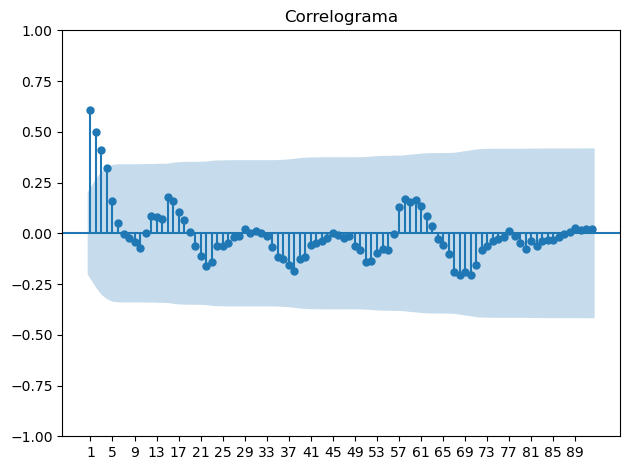

In [199]:

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

residuals = results.resid

fig, ax = plt.subplots()
plot_acf(residuals.squeeze(), lags=92, ax=ax, zero=False)
ax.set_xticks(range(1, 92, 4))
ax.set_title('Correlograma',fontsize=12)
plt.tight_layout()
plt.savefig("correlograma.png", dpi=300)
plt.show()

In [200]:
estacionalidad= ["July", "August", "September", "October", "November", "December",
    "January", "February", "March"][:8] 
df['t'] = df.index

# Create the dummy variable
df["estacionalidad"] = df["Mes"].isin(estacionalidad).astype(int)
df["tendencia"] = range(1, 95)  
df

,Año,Mes,Pan francés(kg),IPC mensual,Índice IPC,IPC (base junio 2017 = 100),Precio deflactado,month_number,month_year,precio_1,precio_2,precio_3,precio_4,precio_5,intercepto,t,estacionalidad,tendencia
0,2017,June,38.64,-,100.00,100,38.64,6,2017-06-01,0.00,0.00,0.00,0.00,0.00,1,0,0,1
1,2017,July,39.12,1.7,101.70,100,38.47,7,2017-07-01,38.64,0.00,0.00,0.00,0.00,1,1,1,2
2,2017,August,39.43,1.4,103.12,100,38.24,8,2017-08-01,38.47,38.64,0.00,0.00,0.00,1,2,1,3
3,2017,September,39.71,1.9,105.08,100,37.79,9,2017-09-01,38.24,38.47,38.64,0.00,0.00,1,3,1,4
4,2017,October,39.89,1.5,106.66,100,37.40,10,2017-10-01,37.79,38.24,38.47,38.64,0.00,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2024,November,3040.97,2.4,6678.45,100,45.53,11,2024-11-01,45.20,45.32,45.23,45.23,45.88,1,89,1,90
90,2024,December,3095.49,2.7,6858.77,100,45.13,12,2024-12-01,45.53,45.20,45.32,45.23,45.23,1,90,1,91
91,2025,January,3154.17,2.2,7009.66,100,45.00,1,2025-01-01,45.13,45.53,45.20,45.32,45.23,1,91,1,92
92,2025,February,3212.93,2.4,7177.89,100,44.76,2,2025-02-01,45.00,45.13,45.53,45.20,45.32,1,92,1,93


In [201]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np
# Separamos en datos de entrenamiento y testeo
# Datos de entrenamiento (2017-2023)

df_train = df[df['month_year'] < '2024-01-01'].copy()

# Datos de testeo (2024 en adelante)

df_test = df[df['month_year'] >= '2024-01-01'].copy()

X_train = df_train[["precio_1","precio_2","precio_3","precio_4","estacionalidad","precio_5","tendencia"]]
y_train = df_train['Precio deflactado']
X_test = df_test[["precio_1", "precio_2", "precio_3", "precio_4","estacionalidad", "precio_5","tendencia"]]
y_test = df_test['Precio deflactado']

#ESTANDARIZACION
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
# --- For X_train ---
columns_to_scale_train = X_train.drop(columns=["estacionalidad"]).columns
columns_to_keep_train = ["estacionalidad"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale_train])
X_train_final = np.hstack([X_train_scaled, X_train[columns_to_keep_train].values])

# --- For X_test ---
columns_to_scale_test = X_test.drop(columns=["estacionalidad"]).columns
columns_to_keep_test = ["estacionalidad"]

X_test_scaled = scaler.transform(X_test[columns_to_scale_test])
X_test_final = np.hstack([X_test_scaled, X_test[columns_to_keep_test].values])

X_train_final


array([[-7.6049785 , -5.76143953, -4.79981054, -4.18517575, -3.74836162,
        -1.71026314,  0.        ],
       [-0.5002427 , -5.76143953, -4.79981054, -4.18517575, -3.74836162,
        -1.66641024,  1.        ],
       [-0.5315006 , -0.29604744, -4.79981054, -4.18517575, -3.74836162,
        -1.62255734,  1.        ],
       [-0.57379069, -0.3200929 , -0.17712014, -4.18517575, -3.74836162,
        -1.57870443,  1.        ],
       [-0.65653218, -0.352625  , -0.19745807, -0.09285137, -3.74836162,
        -1.53485153,  1.        ],
       [-0.72824147, -0.41627475, -0.22497408, -0.11085591, -0.02682138,
        -1.49099863,  1.        ],
       [-0.76317677, -0.47143787, -0.27880976, -0.13521498, -0.04319462,
        -1.44714573,  1.        ],
       [-0.91762754, -0.49831221, -0.32546735, -0.18287404, -0.06534665,
        -1.40329283,  1.        ],
       [-0.91762754, -0.61712508, -0.34819797, -0.22417855, -0.10868756,
        -1.35943993,  1.        ],
       [-0.86246655, -0.6171

In [202]:
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
# Usamos cross-validation para dividir la muestra en training y validation sets
alphas = 10**np.linspace(6,-2,50)*0.1
np.set_printoptions(suppress = True)
lassocv = LassoCV(alphas=alphas,fit_intercept=True ,cv=5, max_iter=100000, random_state=144)
lassocv.fit(X_train_transformed, y_train)
print("Alpha óptimo:", lassocv.alpha_.round(2))

# Ahora estimamos nuevamente el modelo con el alpha (lambda) óptimo
lasso = Lasso(alpha=0.74)
lasso.fit(X_train_transformed, y_train)
lasso_pred = lasso.predict(X_test_transformed)

Alpha óptimo: 0.6


In [203]:
print("Mean Squared Error de testeo (MSE test):", mean_squared_error(y_test, lasso_pred).round(2))
print("Coeficientes del mejor modelo:")
pd.Series(lasso.coef_, index=X_train_transformed_df.columns)

Mean Squared Error de testeo (MSE test): 1.07
Coeficientes del mejor modelo:


precio_1          0.434027
precio_2          0.000000
precio_3          0.000000
precio_4          0.000000
precio_5          0.000000
estacionalidad   -0.000000
tendencia         0.052889
dtype: float64

In [204]:
print(lasso_pred)

[44.6792784  44.60527806 44.50175006 44.65120225 44.65461224 44.74500912
 44.77076437 44.77178023 44.824669   44.88474018 44.92805241 45.00727666
 45.02824364 45.07075783 45.10449353]


In [205]:
print(y_test)

79    47.12
80    45.16
81    46.37
82    45.75
83    46.22
84    45.88
85    45.23
86    45.23
87    45.32
88    45.20
89    45.53
90    45.13
91    45.00
92    44.76
93    44.79
Name: Precio deflactado, dtype: float64
